In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
data = pd.read_feather("word-embeddings.feather")
print(data.head())

embeds = []
for i in range(len(data)):
    embeds.append(data['vit'][i])
embeds = np.asarray(embeds)
train_data = embeds
n_components = 2
cov_matrix = np.cov(train_data,rowvar=False,bias=True)
# print(cov_matrix2[0][1])
train_data = train_data - np.mean(train_data,axis = 0)

# cov_matrix = sum([train_data[i].reshape(-1,1) @ (train_data[i].reshape(-1,1)).T for i in range(train_data.shape[0])])/train_data.shape[0]
# print(cov_matrix[0][1])
eigvalues, eigvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigvalues)[::-1] 
eigvalues = eigvalues[sorted_indices]
eigvectors = eigvectors[:, sorted_indices]

pca_vectors = eigvectors[:,0:n_components]
final_data =  train_data@pca_vectors

class PCA:
    def __init__(self,n_components):
        self.k = n_components
        
    def fit(self,train_data):
        train_data = train_data - np.mean(train_data,axis = 0)
        cov_matrix = np.cov(train_data,rowvar=False,bias=True)
        eigvalues, eigvectors = np.linalg.eig(cov_matrix)
        sorted_indices = np.argsort(eigvalues)[::-1] 
        eigvalues = eigvalues[sorted_indices]
        eigvectors = eigvectors[:, sorted_indices]

        self.prcomp = eigvectors[:,0:self.k]

    def transform(self,train_data):
        train_data = train_data - np.mean(train_data,axis = 0)
        return train_data @ self.prcomp
    
    def checkPCA(self,train_data,transformed_data):
        if(transformed_data.shape == (train_data.shape[0],self.k)):
            return True
        return False

   words                                                vit
0  drive  [-0.012995675206184387, -0.10337956249713898, ...
1   sing  [0.09755142033100128, -0.09364829212427139, -0...
2   deer  [0.17334489524364471, -0.2442416399717331, 0.1...
3  panda  [0.040555089712142944, -0.10053896903991699, 0...
4    ape  [-0.03181127458810806, -0.006482355296611786, ...


PCA transformation successful!


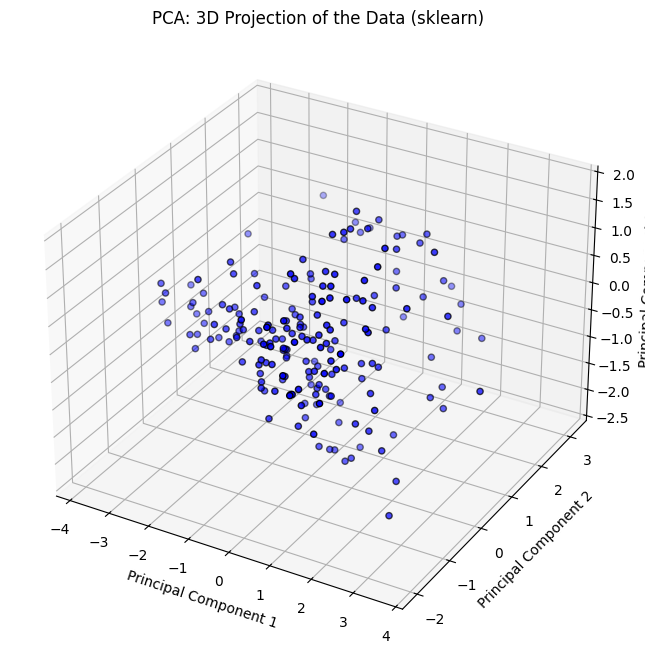

In [81]:
# Initialize PCA with desired number of components
pca = PCA(n_components=3)
from mpl_toolkits.mplot3d import Axes3D

# Fit the PCA model to the training data
pca.fit(train_data)

# Transform the data using the PCA model
transformed_data = pca.transform(train_data)

# Check if PCA transformation was successful
if pca.checkPCA(train_data, transformed_data):
    print("PCA transformation successful!")
else:
    print("PCA transformation failed.")

# plt.figure(figsize=(8, 6))
# plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='blue', marker='o', edgecolor='k')
# plt.title("PCA: 2D Projection of the Data")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.grid(True)
# plt.show()
# print(final_data.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c='blue', marker='o', edgecolor='k')

ax.set_title("PCA: 3D Projection of the Data (sklearn)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()



In [73]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
data = pd.read_feather("word-embeddings.feather")
embeds = np.array([data['vit'][i] for i in range(len(data))])

# Initialize PCA with the desired number of components
n_components = 3
pca = PCA(n_components=n_components)

# Fit the PCA model and transform the data
transformed_data = pca.fit_transform(embeds)

# Print explained variance ratio (optional)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the transformed data (if n_components=2)
# plt.figure(figsize=(8, 6))
# plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='blue', marker='o', edgecolor='k')
# plt.title("PCA: 2D Projection of the Data (sklearn)")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.grid(True)
# plt.show()


Explained variance ratio: [0.09169602 0.04079532 0.03241616]


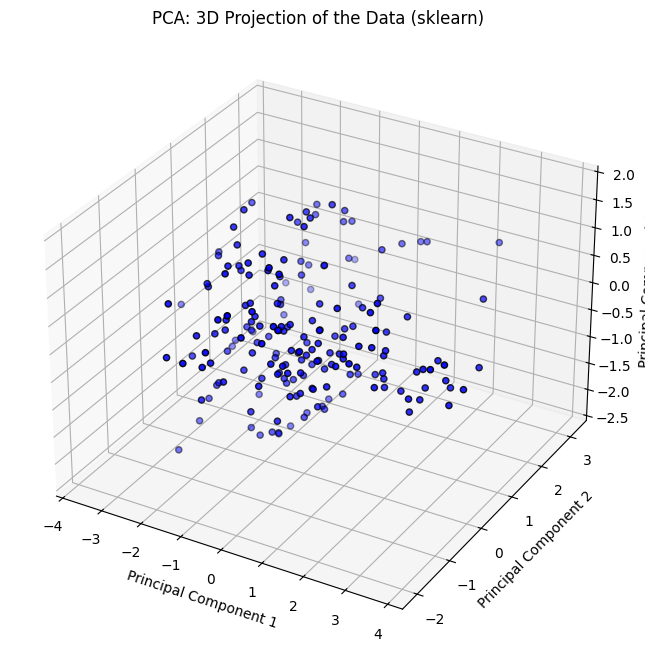

In [82]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
data = pd.read_feather("word-embeddings.feather")
embeds = np.array([data['vit'][i] for i in range(len(data))])

# Initialize PCA with 3 components
n_components = 3
pca = PCA(n_components=n_components)

# Fit the PCA model and transform the data
transformed_data = pca.fit_transform(embeds)

# Plot the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c='blue', marker='o', edgecolor='k')

ax.set_title("PCA: 3D Projection of the Data (sklearn)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()


   words                                                vit
0  drive  [-0.012995675206184387, -0.10337956249713898, ...
1   sing  [0.09755142033100128, -0.09364829212427139, -0...
2   deer  [0.17334489524364471, -0.2442416399717331, 0.1...
3  panda  [0.040555089712142944, -0.10053896903991699, 0...
4    ape  [-0.03181127458810806, -0.006482355296611786, ...
PCA transformation successful!


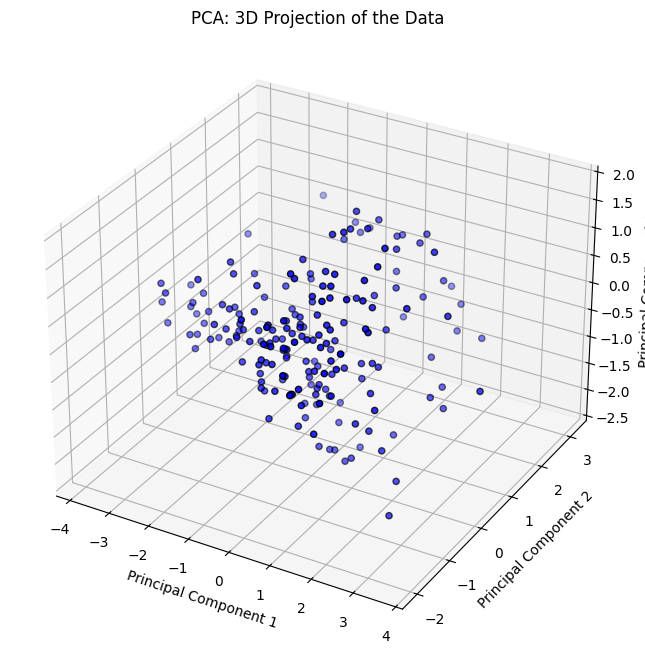

In [86]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# PCA class definition
class PCA:
    def __init__(self, n_components):
        self.k = n_components

    def fit(self, train_data):
        # Center the data
        train_data = train_data - np.mean(train_data, axis=0)
        
        # Compute covariance matrix
        cov_matrix = np.cov(train_data, rowvar=False, bias=True)
        
        # Eigen decomposition
        eigvalues, eigvectors = np.linalg.eig(cov_matrix)
        
        # Sort the eigenvalues and corresponding eigenvectors in descending order
        sorted_indices = np.argsort(eigvalues)[::-1]
        eigvalues = eigvalues[sorted_indices]
        eigvectors = eigvectors[:, sorted_indices]
        
        # Select the top k principal components
        self.prcomp = eigvectors[:, 0:self.k]

    def transform(self, train_data):
        # Center the data
        train_data = train_data - np.mean(train_data, axis=0)
        
        # Project the data onto the principal components
        transformed_data = train_data @ self.prcomp
        
        # Return the real part only
        return np.real(transformed_data)

    def checkPCA(self, train_data, transformed_data):
        # Verify the transformation
        return transformed_data.shape == (train_data.shape[0], self.k)

# Load and process the data
data = pd.read_feather("word-embeddings.feather")
print(data.head())

# Convert 'vit' column to NumPy array
embeds = np.stack(data['vit'].values)
train_data = np.asarray(embeds)

# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Fit the PCA model to the training data
pca.fit(train_data)

# Transform the data using the PCA model
transformed_data = pca.transform(train_data)

# Check if PCA transformation was successful
if pca.checkPCA(train_data, transformed_data):
    print("PCA transformation successful!")
else:
    print("PCA transformation failed.")

# 3D Plot of the transformed data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D space
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c='blue', marker='o', edgecolor='k')

ax.set_title("PCA: 3D Projection of the Data")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()
